# Linked lists

We've studied arrays/lists that are built into Python but they are not always the best kind of list to use. Sometimes, we are inserting and deleting things from the head or middle of the list. If we do this with lists implemented as contiguous arrays (made up of contiguous cells in memory), we have to move a lot of cells around to make room for a new element or to close a hole made by a deletion.

*Linked list* implementations of abstract lists allow us to efficiently insert and remove things anywhere we want. This flexibility comes at the cost of more memory.

The other reason to study linked lists is that the notion of a linked list *node* is easily extended to create hierarchical parent-child data structures called *trees* and then to *graphs* (that track any node->node relationship).

*TODO*: use graphviz or something else to visualize the structures. move the tree discussion to a separate page. This lecture going very quickly, confusing some students, took about 1.5 hours without the trees. Have the students connect a few notes together and visualize it. Start with tuples then do graphviz.

## Metaphor for linked lists vs arrays

Imagine that I wanted to take roll in class. Since everyone is sitting next to each other, i.e. contiguous, I can simply point from one person to the next by looking to the left or right. That's the way lists work, as contiguous chunks.

A linked list requires everybody to not only remember their name but also who is to the right of them (a next pointer).  As long as I remember the first person (the head) in the list, I can call that person later and ask for their name. Then I can ask them to refer to the next person in line.  This works even if people distribute across the continent or randomly reassign where they are sitting. There is no requirement that these elements be contiguous because each node in the list has the information needed to get to the next person.

A linked list implementation associates a next pointer with each list value. We call these things *nodes* usually: `[value,next]` or `(value,next)`. We also keep a pointer to the *head* of the list and sometimes the *tail* of the list.

The simplest list has one element with a `next` pointer/reference that points at nothing.

```python
users = ("parrt", None)
```
<img src="images/links1.png" style="width:200px">

Here's one with two elements:

```python
users = ("parrt", ("tombu", None))
```
<img src="images/links2.png" style="width:290px">

and three elements:

```python
users = ("parrt", ("tombu", ("afedosov", None)))
```
<img src="images/links3.png" style="width:400px">

In practice, we'll use lists not tuples, because tuples are immutable. We want to be able to change the node `next` pointers:

```python
a = ["parrt", None]
b = ["tombu", None]
c = ["afedosov", None]
users = a # points to first node of list
a[1] = b  # first node's next points to 2nd element
b[1] = c
```

The most basic implementation of a list is just a *head* pointer (here I'm using `users` for a specific list). Creating an empty linked list is then just a matter of saying `users=None`.

Naturally, we can store any kind of object we want for the value component, not just strings. We can store numbers or even other lists!

## Support code

Let's add some support code that will make it easier to build and manipulate linked lists. It uses some object-oriented programming syntax from Python, which you can ignore if you want. Basically, I'm defining an object (a data aggregate) called `Node` that will have two fields `value` and `next`. It's much easier to access field names than `p[0]` and `p[1]` for some tuple/list `p`.

In [3]:
class Node:
    def __str__(self):
        return "(%s,%s)" % (self.value, str(self.next))
    def __repr__(self):
        return str(self)
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

With that definition, we can create lists more naturally:

In [5]:
a = Node("parrt")
b = Node("tombu")
c = Node("dmose")
print(a, b, c)

# Now link them up
users = a
a.next = b
b.next = c
print(users)

(parrt,None) (tombu,None) (dmose,None)
(parrt,(tombu,(dmose,None)))


## Inserting nodes at the head

Ok, so let's say we create an empty list with `head=None`. To insert something, say, `'hi'` at the head of a linked list, there are two cases: an empty list and a nonempty list. An empty list is a case where `head==None`, the initial conditions of the list. A nonempty list of course will have `head` pointing at some tuple. Both cases can be handled the same way:

```python
head = Node('hi', head)
```

That makes a new node holding the new value `'hi'` and a `next` pointer pointing at the old head tuple (even if `None`). Finally, it sets the `head` pointer to point at the new tuple.

Inserting in the middle is more complicated. We need to find the node *after* which we want to insert something. Then we hook in the new node.For example, to insert something between `tombu` and `dmose`, we create a new node whose `next` pointer points at `dmose`'s node (what `tombu` points at. Then we set `tombu`'s `next` pointer to point to the new node containing `"mary"`:

In [8]:
b.next = Node("mary",b.next)
users

(parrt,(tombu,(mary,(mary,(dmose,None)))))

## Walking a linked list

Assuming we have a linked list constructed, how do we walk that list? With an array, we can just access the *i*th value and move *i* along the list.  To walk a linked list, we have to define a *cursor*  (often called `p` or `q`), which we can think of as just a finger we move along between the nodes in a list. Here's the code pattern to walk a linked list and print out the values:

In [11]:
p = users
while p is not None:
    print(p.value)
    p = p.next

parrt
tombu
mary
mary
dmose


### A recursive version

There's another way to walk data structures that uses what we call *recursion*. We are familiar with the concept from recurrence relations. In this case, note that starting at any node in the linked list, the rest of the list looks like a linked list. It's like a fractal, where no matter how much you zoom in and it still looks like a fractal.

A recursive function call is one that calls the function surrounding it. The most obvious one is:

```python
def f():
    f()
```

But, that's not very useful because it is an infinite loop.  The first thing the function `f()` does is call it self, causing a loop. We typically have a termination condition that tells it when to stop recursing. 

Here's how we would recursively walk a list:

In [14]:
def walk(p):
    if p is None: return
    print(p.value)
    walk(p.next)

walk(users)

parrt
tombu
mary
mary
dmose


## Exercise

Create a function called `tostr` that returns a bracketed string like `['parrt', 'tombu', 'dmose']` given a link list `head` as an argument. Hint: Reduce this to a problem we know how to solve. Just add the elements to a regular Python list (`[]`) as you find them in the linked list; then return the string representation of that list using `str()`.

In [17]:
def tostr(head):
    p = head
    values = []
    while p is not None:
        values.append(p.value)
        p = p.next
    return str(values)

tostr(users)

"['parrt', 'tombu', 'mary', 'mary', 'dmose']"

## Exercise

Implement method `len(head)` that counts and returns the number of elements in the linked list referred to by `head`.  Return zero if the list is empty. Hint: This is just adding a counter-accumulator pattern to the list walking pattern.

In [19]:
def len(head):
    p = head
    n = 0
    while p is not None:
        n = n + 1
        p = p.next
    return n

len(users)

5

We can also make a recursive version of that function:

In [21]:
def rlen(head):
    if head is None: return 0
    return 1 + rlen(head.next)

rlen(users)

5

## Exercise

Implement method called `getitem(head, i)` that returns the ith node in a list `head` starting from zero. Hint: Combine a counter-accumulator loop with a search loop (look for counter hitting `i`) and the list walker pattern. Another way to think about this is that it is adding a search pattern to the previous length exercise.

In [23]:
def getitem(head,j):
    "Return ith node in the list starting from 0 or return None if invalid index"
    i = 0
    p = head
    while p is not None:
        if i == j:
            return p
        i = i + 1
        p = p.next
    return None

print(getitem(users, 0).value)
print(getitem(users, 1).value)
print(getitem(users, 2).value)
print(getitem(users, -1))
print(getitem(users, 999))

parrt
tombu
mary
None
None


## Delete first element

To delete the first node of a list, all we have to do is make the `head` point at what the first node's `next` points at, being careful to check for the empty list condition:

```python
if head is not None:
    head = head.next
```


## A taste of trees

Once we're comfortable with the notion of pointers/references from one node to the other, we can extend nodes to have two pointers instead of just one `next` pointer.   A *binary tree* consists of nodes that have `left` and `right` child pointers; one or both of those pointers can be `None`. A tree reduces to a linked list if each tree node has at most one child.

Trees are very common data structure in analytics, particularly machine learning. For example, there is a form of clustering called *hierarchical clustering* that constructs trees of related element groups. Then, one of the most powerful machine learning models is called *random forest* and consists of a collection of decision trees that work together to provide a very strong predictor or classifier.

We draw trees upside down from their normal biological perspective. The **root** of the tree is a single node and is drawn at the top of the diagram.  The **leaves** of the tree are the children that themselves have no children.

Here is some support code for a tree node that you can safely ignore, except that the tree nodes (data aggregates) contain `value`, `left`, and `right` fields.

In [24]:
class TNode:
    def __str__(self):
        return "(%s,%s,%s)" % (self.value, str(self.left), str(self.right))
    def __repr__(self):
        return str(self)
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

To test it out, we can create nodes just like linked list nodes and then hook them up as we want:

In [26]:
myroot = prez = TNode("Paul")
provost = TNode("Don")
som = TNode("Liz")
cas = TNode("Marcelo")

prez.left = provost
provost.left = som
provost.right = cas

prez

(Paul,(Don,(Liz,None,None),(Marcelo,None,None)),None)

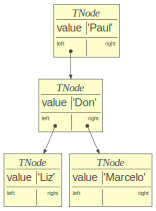

In [29]:
from lolviz import *
treeviz(prez)

### Walking trees

While it is most common to use a `while` loop to traverse a linked list, is most common to use recursion to traverse a tree. For example, here is how we would print out all the elements in a tree in *preorder*, meaning printing the value added note before it's children.

In [31]:
def walk(t):
    if t is None: return
    print(t.value)
    walk(t.left)
    walk(t.right)

walk(prez)

Paul
Don
Liz
Marcelo
